
# Importancia del Escalado de Características

Escalado de características mediante estandarización (o normalización Z-score) puede ser un paso de preprocesamiento importante para muchos  Algoritmos de ML. La estandarización consiste en reescalar las características
que tienen las propiedades de una distribución normal estándar con una media de cero y una desviación estándar de uno.

Mientras que muchos algoritmos (tales como SVM, K-K-nearest neighbors, y  regresión logística) requieren características que se normalizan, intuitivamente podemos pensar en el análisis de componentes principales (PCA) como un ejemplo de cuando la normalización es importante. En PCA estamos interesados en la componentes que maximizan la varianza. Si un componente (p. ej., altura) varía menos que otro (por ejemplo, peso) debido a su respectivas escalas (metros vs. kilos), la PCA podría determinar que el Dirección de la varianza máxima se corresponde más estrechamente con el eje "peso", si esas entidades no se escalan. Como un cambio en la altura de un metro puede considerarse mucho más importante que la cambio en el peso de un kilogramo, esto es claramente incorrecto.

Para ilustrar esto, la PCA se realiza comparando el uso de datos con : clase: ' StandardScaler <sklearn.preprocessing.StandardScaler>' aplicado, a los datos sin escala. Los resultados se visualizan y se observa una clara diferencia.
Se puede ver el 1er componente principal en el conjunto sin escala. Se puede ver que la característica #13 domina la dirección, siendo un conjunto de dos órdenes de magnitud por encima de las otras características. Esto se contrasta al observar
el componente principal de la versión escalada de los datos. En la escala versión, las órdenes de magnitud son aproximadamente las mismas en todas las características.

El conjunto de datos utilizado es el DataSet de vino disponible en UCI. Este conjunto de datos tiene características continuas que son heterogéneas en escala debido a las diferencias propiedades que miden (es decir, el contenido de alcohol y el ácido málico).

Los datos transformados se utilizan para entrenar un clasificador Bayes ingenuo, y un diferencia clara en las precisiones de predicción se observa en el que el DataSet que se escala antes de PCA supera enormemente la versión sin escala

In [0]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
print(__doc__)

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = load_wine(return_X_y=True)



Automatically created module for IPython interactive environment


In [0]:
# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)


In [0]:

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

In [0]:

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [0]:

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the normal test dataset with PCA
81.48%


Prediction accuracy for the standardized test dataset with PCA
98.15%



In [0]:
# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']


In [0]:

# Show first principal components
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])


PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


In [0]:
# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

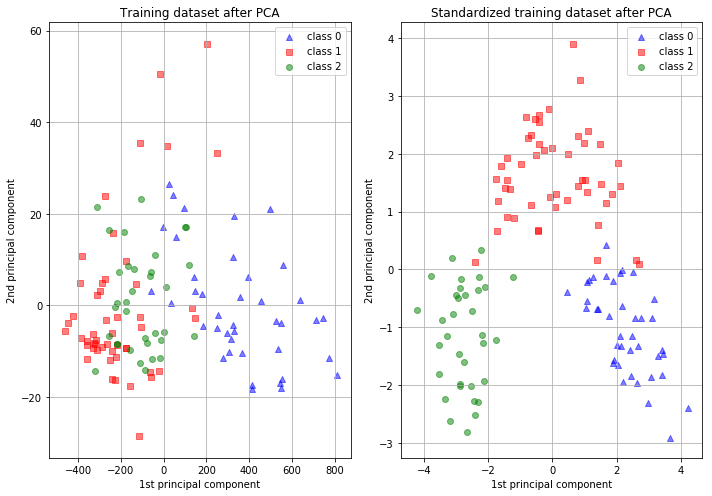

In [0]:
# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()